In [4]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
import os
import re
import string
from IPython.display import Image
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import gensim
import numpy as np

In [5]:
print(os.getcwd())

C:\Users\Asus-2021\Documents


In [6]:
input_directory1 = "1991 Hepth CTM LDA Topics/CTMLDA";

In [14]:
for doc_id in input_docs_id1:
    if not doc_id.endswith(".txt"):
        input_docs_id1.remove(doc_id)

In [18]:
input_docs_content = []

In [19]:
for doc_id in input_docs_id1[:100]:
    with open(input_directory1 + "/" + doc_id,"r") as f:
        input_docs_content.append(f.read())

In [23]:
len(input_docs_content)

400

## Pre Processing

### Text lowercase conversion

In [24]:
for i in range(len(input_docs_content)):
    input_docs_content[i] = input_docs_content[i].lower()

### Remove numbers

In [25]:
for i in range(len(input_docs_content)):
    input_docs_content[i] = re.sub(r'\d+', '', input_docs_content[i])

### Remove Punctuation

In [26]:
translator = str.maketrans('', '', string.punctuation)
for i in range(len(input_docs_content)):
    input_docs_content[i] = input_docs_content[i].translate(translator)

### Remove WhiteSpace

In [27]:
for i in range(len(input_docs_content)):
    input_docs_content[i] = " ".join(input_docs_content[i].split())

### Tokenization


In [28]:
feature_terms = []
for i in range(len(input_docs_content)):
    feature_terms.append(nltk.tokenize.word_tokenize(input_docs_content[i]))

### Stop Word removal

In [29]:
stop_words = set(nltk.corpus.stopwords.words("english"))

for i in range(len(feature_terms)):
    feature_terms[i] = [word for word in feature_terms[i] if word not in stop_words]

### remove single and double letter words

In [30]:
filtered_feature_term=[]

for feature_term in feature_terms:
    temp_list = []
    for feature in feature_term:
        if not(len(feature)==1 or len(feature)==2):
            temp_list.append(feature)
    filtered_feature_term.append(temp_list)

In [31]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus-2021\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Removing meaningless words

In [32]:
tempfeatures=[]
for n in filtered_feature_term:
    temp=[]
    for p in n:
        if p in words:
            temp.append(p)
    tempfeatures.append(temp)
    

In [33]:
feature_terms = tempfeatures

In [34]:
pd.DataFrame(feature_terms)

,0,1,2,3,4,5,6,7,8,9,...,14278,14279,14280,14281,14282,14283,14284,14285,14286,14287
0,exact,black,string,three,department,physics,university,abstract,family,exact,...,None,None,None,None,None,None,None,None,None,None
1,june,construction,department,physics,queen,mary,college,mile,end,road,...,None,None,None,None,None,None,None,None,None,None
2,algebra,department,physics,university,southern,study,classical,version,second,structure,...,None,None,None,None,None,None,None,None,None,None
3,august,ground,ring,two,dimensional,string,theory,school,natural,institute,...,None,None,None,None,None,None,None,None,None,None
4,fusion,laboratory,physics,university,discuss,rational,conformal,field,theory,expressed,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,first,noncritical,relativistic,string,institute,theoretical,physics,law,university,law,...,None,None,None,None,None,None,None,None,None,None
396,related,subalgebra,laboratory,theoretical,physics,joint,institute,nuclear,research,region,...,None,None,None,None,None,None,None,None,None,None
397,black,hole,formation,two,dimensional,gravity,das,institute,fundamental,research,...,None,None,None,None,None,None,None,None,None,None
398,quantum,partial,department,mathematics,laboratory,physics,university,landau,institute,theoretical,...,None,None,None,None,None,None,None,None,None,None


### Stemming

In [21]:
# filtered_feature_term=[]

# stemmer = nltk.stem.porter.PorterStemmer()

# for feature_term in feature_terms:
#     filtered_feature_term.append([stemmer.stem(word) for word in feature_term])

## A. TERM CORRELATION BASED ON CO-OCCURRENCE

In [35]:
unique_words = set()

In [36]:
for feature_term in feature_terms:
    for feature in feature_term:
        unique_words.add(feature)

In [37]:
len(unique_words)

7452

In [38]:
unique_words = list(unique_words)

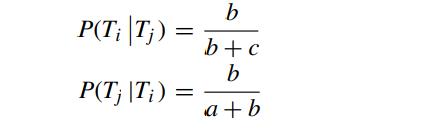

In [27]:
Image(filename='images/R_formula_1.png') 

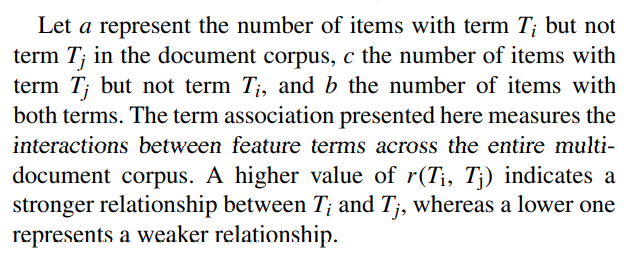

In [28]:
Image(filename='images/R_formula_2.png') 

In [39]:
R_matrix=[]
for T_i in unique_words[:50]:
    temp_list = []
    for T_j in unique_words[:50]:
        if T_i == T_j:
            temp_list.append(0)
            continue
        a=0
        b=0
        c=0
        for feature_term in feature_terms:
            if (T_i in feature_term) and not (T_j in feature_term):
                a=a+1
            if (T_j in feature_term) and not (T_i in feature_term):
                c=c+1
            if (T_j in feature_term) and (T_i in feature_term):
                b=b+1
        try:
            ptitj = (b)/(b+c)
        except ZeroDivisionError:
            ptitj = 0
        try:
            ptjti = (b)/(a+b)
        except ZeroDivisionError:
            ptjti = 0
        try:
            rtitj = (ptitj * ptjti) / ((ptitj + ptjti) - (ptitj * ptjti))
        except ZeroDivisionError:
            rtitj = 0
        temp_list.append(rtitj)
    R_matrix.append(temp_list)
        

In [40]:
pd.DataFrame(R_matrix,columns = unique_words[:50]).head()

,mately,analyse,problem,queen,electrically,stree,dihedral,qua,mistake,decreasing,...,inclusion,aka,imperative,retaining,degree,university,different,forcing,pierced,simulation
0,0.000000,0.000000,0.003704,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.003460,0.011765,0.00000,0.000000,0.00000
1,0.000000,0.000000,0.054545,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.066667,...,0.032787,0.000000,0.000000,0.045455,0.060403,0.047458,0.050000,0.00000,0.000000,0.00000
2,0.003704,0.054545,0.000000,0.011029,0.014815,0.00369,0.007353,0.007407,0.00738,0.079710,...,0.102113,0.007380,0.007407,0.007380,0.320388,0.570225,0.232639,0.00738,0.011111,0.01845
3,0.000000,0.000000,0.011029,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007042,0.000000,0.022727,0.00000,0.000000,0.00000
4,0.000000,0.000000,0.014815,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.032258,...,0.021739,0.000000,0.200000,0.000000,0.014286,0.013841,0.000000,0.00000,0.000000,0.00000


## B. SEMANTIC GRAPH CONSTRUCTION

In [41]:
G_adj_matrix = []
W=0.02

In [42]:
for i in range(len(R_matrix)):
    temp_list=[]
    for j in range(len(R_matrix)):
        if R_matrix[i][j]>W:
            temp_list.append(1)
        else:
            temp_list.append(0)
    G_adj_matrix.append(temp_list)

In [43]:
G = nx.DiGraph(pd.DataFrame(G_adj_matrix).values)

In [44]:
node_labels = {}
for i in range(250):
    node_labels[i]=unique_words[i]

In [45]:
plt.figure(3,figsize=(12,12)) 
nx.draw_random(G,labels = node_labels)
plt.show()

NetworkXError: random_state_index is incorrect

<Figure size 864x864 with 0 Axes>

### Max frequency Word

In [46]:
from collections import defaultdict
freq=defaultdict(int)

for i in unique_words:
    for j in feature_terms:
        for k in j:
            if i==k:
                freq[i]+=1
                

In [47]:
max_freq=0
max_freq_word=""
for item in freq.items():
    if item[1]>max_freq:
        max_freq = item[1]
        max_freq_word = item[0]

In [48]:
max_freq_word

'theory'

## C. SEMANTIC GRAPH REFINEMENT

### 1.  GENERATING THE CONTEXTUAL RELATIONSHIPS

In [49]:
model = gensim.models.Word2Vec(feature_terms, min_count = 1,window = 5, sg = 1)

In [50]:
C_matrix=[]
for i in range(50):
    temp_list = []
    for j in range(50):
        if i==j:
            temp_list.append(0)
        else:
            temp_list.append(model.wv.similarity(unique_words[i],unique_words[j]))
    C_matrix.append(temp_list)

In [51]:
pd.DataFrame(C_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.739692,0.502000,0.665263,0.735940,0.953032,0.929877,0.948502,0.888983,0.656308,...,0.705553,0.948913,0.937723,0.944281,0.517563,0.472898,0.631934,0.945680,0.942092,0.911919
1,0.739692,0.000000,0.536689,0.455877,0.624687,0.762535,0.684472,0.773023,0.649610,0.324867,...,0.584335,0.766523,0.698392,0.719846,0.334913,0.295543,0.576281,0.690070,0.621745,0.765617
2,0.502000,0.536689,0.000000,0.368343,0.477289,0.538144,0.431831,0.567653,0.437513,0.282205,...,0.415927,0.558920,0.509613,0.526280,0.271070,0.210628,0.382804,0.506511,0.429907,0.531652
3,0.665263,0.455877,0.368343,0.000000,0.593283,0.690847,0.672625,0.702952,0.691863,0.307633,...,0.288547,0.695870,0.770002,0.679606,0.198682,0.795189,0.253224,0.623723,0.682559,0.688339
4,0.735940,0.624687,0.477289,0.593283,0.000000,0.749275,0.607380,0.765760,0.689260,0.646813,...,0.533056,0.766252,0.734559,0.785872,0.203986,0.374622,0.513010,0.810624,0.771070,0.744576


### 2.  REFINING THE SEMANTIC GRAPH

In [52]:
k = 0.5

for i in range(len(R_matrix)):
    for j in range(len(R_matrix)):
        if C_matrix[i][j]<k:
            R_matrix[i][j]=0
            G_adj_matrix[i][j]=0

In [53]:
G = nx.DiGraph(pd.DataFrame(G_adj_matrix).values)

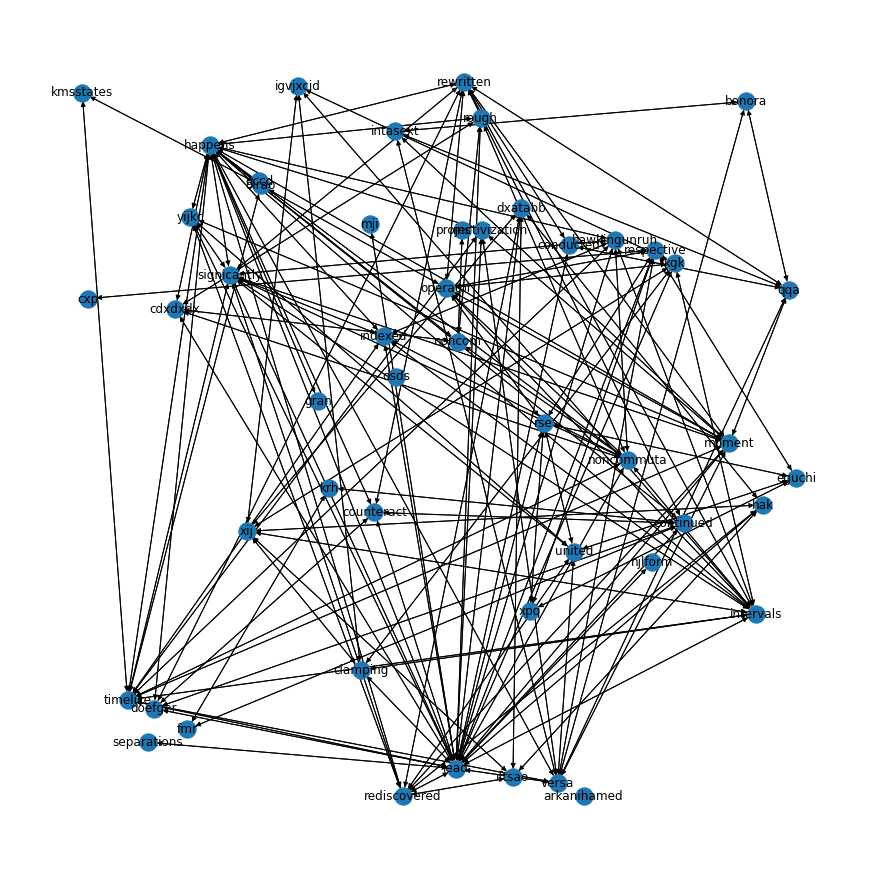

In [42]:
plt.figure(3,figsize=(12,12)) 
nx.draw_random(G,labels = node_labels)
plt.show()

## TOPIC MINING FROM THE REFINED SEMANTIC GRAPH

### A. SUBGRAPH SEGMENTATION

In [54]:
W_matrix=[]

In [55]:
for i in range(len(R_matrix)):
    temp_list=[]
    for j in range(len(R_matrix)):
        temp_list.append(0)
    W_matrix.append(temp_list)

for i in range(len(R_matrix)):
    for j in range(len(R_matrix)):
        if W_matrix[i][j]!=0:
            continue
        W_matrix[i][j]=R_matrix[i][j]
        W_matrix[j][i]=R_matrix[i][j]

In [56]:
D_matrix=[]

In [57]:
row_sum=[]
for i in range(len(W_matrix)):
    cur_sum=0
    for j in range(len(W_matrix)):
        cur_sum=cur_sum + W_matrix[i][j]
    row_sum.append(cur_sum)

for i in range(len(W_matrix)):
    temp_list=[]
    for j in range(len(W_matrix)):
        if i==j:
            temp_list.append(row_sum[i])
        else:
            temp_list.append(0)
    D_matrix.append(temp_list)

In [58]:
L_matrix=[]

In [59]:
for i in range(len(W_matrix)):
    temp_list=[]
    for j in range(len(W_matrix)):
        temp_list.append(D_matrix[i][j]-W_matrix[i][j])
    L_matrix.append(temp_list)

## N cut Algorithm

In [60]:
import sys
from numpy import array, reshape, shape, matrix, ones, zeros, sqrt, sort, arange
from numpy import nonzero, fromfile, tile, append, prod, double, argsort, sign
from numpy import kron, multiply, divide, abs, reshape, asarray
from scipy import rand
from scipy.sparse import csc_matrix, spdiags
from scipy.sparse.linalg.eigen.arpack import eigsh
from scipy.linalg import norm, svd, LinAlgError

In [61]:
class SVDError(Exception):
    def __init__(self, value):
        self.value = value

    def __str__(self):
        return repr(self.value)

In [62]:
def ncut(W, nbEigenValues):
    
    offset = .5
    maxiterations = 100
    eigsErrorTolerence = 1e-6
    truncMin = 1e-6
    eps = 2.2204e-16

    m = shape(W)[1]

    d = abs(W).sum(0)
    dr = 0.5 * (d - W.sum(0))
    d = d + offset * 2
    dr = dr + offset

    W = W + spdiags(dr, [0], m, m, "csc")
    Dinvsqrt = spdiags((1.0 / sqrt(d + eps)), [0], m, m, "csc")
    P = Dinvsqrt * (W * Dinvsqrt);


    eigen_val, eigen_vec = eigsh(P, nbEigenValues, tol=eigsErrorTolerence, which='LA')

    i = argsort(-eigen_val)
    eigen_val = eigen_val[i]
    eigen_vec = eigen_vec[:, i]

    eigen_vec = Dinvsqrt * matrix(eigen_vec)
    norm_ones = norm(ones((m, 1)))
    for i in range(0, shape(eigen_vec)[1]):
        eigen_vec[:, i] = (eigen_vec[:, i] / norm(eigen_vec[:, i])) * norm_ones
        if eigen_vec[0, i] != 0:
            eigen_vec[:, i] = -1 * eigen_vec[:, i] * sign(eigen_vec[0, i])

    return (eigen_val, eigen_vec)

In [63]:
def discretisation(eigen_vec):
    eps = 2.2204e-16

    [n, k] = shape(eigen_vec)
    vm = kron(ones((1, k)), sqrt(multiply(eigen_vec, eigen_vec).sum(1)))
    eigen_vec = divide(eigen_vec, vm)

    svd_restarts = 0
    exitLoop = 0

    while (svd_restarts < 30) and (exitLoop == 0):

        c = zeros((n, 1))
        R = matrix(zeros((k, k)))
        R[:, 0] = eigen_vec[int(rand(1) * (n)), :].transpose()

        for j in range(1, k):
            c = c + abs(eigen_vec * R[:, j - 1])
            R[:, j] = eigen_vec[c.argmin(), :].transpose()

        lastObjectiveValue = 0
        nbIterationsDiscretisation = 0
        nbIterationsDiscretisationMax = 20

        while exitLoop == 0:
            nbIterationsDiscretisation = nbIterationsDiscretisation + 1

            tDiscrete = eigen_vec * R

            j = reshape(asarray(tDiscrete.argmax(1)), n)
            eigenvec_discrete = csc_matrix((ones(len(j)), (range(0, n), array(j))), shape=(n, k))


            tSVD = eigenvec_discrete.transpose() * eigen_vec
           
            try:
                U, S, Vh = svd(tSVD)
                svd_restarts += 1
            except LinAlgError:
                
                print >> sys.stderr, "SVD did not converge, randomizing and trying again"
                break

            NcutValue = 2 * (n - S.sum())
            if ((abs(NcutValue - lastObjectiveValue) < eps ) or
                    ( nbIterationsDiscretisation > nbIterationsDiscretisationMax )):
                exitLoop = 1
            else:
                
                lastObjectiveValue = NcutValue
                R = matrix(Vh).transpose() * matrix(U).transpose()

    if exitLoop == 0:
        raise SVDError("SVD did not converge after 30 retries")
    else:
        return (eigenvec_discrete)

In [64]:
eigen_val, eigen_vec = ncut(np.array(W_matrix),10)

In [65]:
eigenvec_discrete = discretisation(eigen_vec)

<ipython-input-63-1cbf25d9b627>:15: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  R[:, 0] = eigen_vec[int(rand(1) * (n)), :].transpose()


In [66]:
eigenvec_discrete

<50x10 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Column format>

In [67]:
eigen_val

array([0.6944518 , 0.6374533 , 0.60444116, 0.58709361, 0.57057394,
       0.55870731, 0.53767767, 0.49531008, 0.49303619, 0.4929166 ])

## Topic Clustering

In [68]:
from sklearn.mixture import GaussianMixture

In [69]:
gm = GaussianMixture(n_components=10, random_state=123, n_init=10)
preds = gm.fit_predict(W_matrix)

In [70]:
preds

array([1, 5, 1, 1, 8, 2, 1, 4, 1, 5, 1, 1, 1, 1, 1, 0, 1, 5, 2, 5, 5, 5,
       1, 4, 5, 1, 5, 9, 5, 1, 3, 5, 1, 1, 1, 1, 8, 1, 1, 1, 5, 7, 6, 2,
       1, 1, 5, 0, 8, 1], dtype=int64)

In [71]:
from collections import defaultdict
clusters=defaultdict(list)

In [72]:
i = 0
for cluster_no in preds:
    clusters[cluster_no].append(unique_words[i])
    i=i+1

In [73]:
clusters

defaultdict(list,
            {1: ['mately',
              'problem',
              'queen',
              'dihedral',
              'mistake',
              'quiet',
              'legged',
              'parlance',
              'revert',
              'thank',
              'parallelogram',
              'increasingly',
              'study',
              'becker',
              'unshaded',
              'energy',
              'tailed',
              'bitter',
              'blemish',
              'mesonic',
              'ultra',
              'degree',
              'university',
              'simulation'],
             5: ['analyse',
              'decreasing',
              'accomplish',
              'come',
              'previous',
              'independently',
              'validity',
              'well',
              'incorrect',
              'cation',
              'inclusion',
              'different'],
             8: ['electrically', 'sampling', 'pierced'],
  

In [74]:
import csv
with open('test6.csv', 'w') as f:
    for key in clusters.keys():
        f.write("%s, %s\n" % (key, clusters[key]))